<a href="https://colab.research.google.com/github/imymemineyay/Mini-Project-3/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 로딩

In [ ]:
import numpy as np # Numpy
import pandas as pd # Pandas
import matplotlib as mpl #Matplotlib 세팅용
import matplotlib.pyplot as plt # 시각화 도구
import seaborn as sns # 시각화 도구
from sklearn.model_selection import train_test_split # 데이터셋 분리
from sklearn.model_selection import KFold # KFold 교차검증
from sklearn.cluster import KMeans # 클러스터링
from sklearn.metrics import silhouette_score # 실루엣 점수
import xgboost as xgb # XGBoost
from sklearn.model_selection import GridSearchCV # 그리드 서치
from sklearn.metrics import accuracy_score, precision_score # 평가 지표
from sklearn.metrics import recall_score, confusion_matrix, roc_auc_score, f1_score # 평가 지표
from imblearn.combine import SMOTEENN, SMOTETomek # 복합샘플링
from hyperopt import hp, fmin, tpe, Trials # HyperOPT

import warnings # 경고문 제거용


%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='D2Coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')
sns.set(font="D2Coding", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10,8))

# 데이터 불러오기

In [ ]:
data = pd.read_excel('train_test_na_filled.xlsx', sheet_name='Train')

# 시각화를 위한 전처리

In [ ]:
# 필요없는 features 제거
data.drop(['PassengerId', 'Cabin', 'Combi', 'Name',], axis=1, inplace=True)

In [ ]:
# 결측값들 제거(Cabin)
data.dropna(axis=0, inplace=True)

# 데이터 탐색

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8590 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8590 non-null   object 
 1   CryoSleep     8590 non-null   bool   
 2   Cabin1        8590 non-null   object 
 3   Cabin2        8590 non-null   float64
 4   Cabin3        8590 non-null   object 
 5   Destination   8590 non-null   object 
 6   Age           8590 non-null   int64  
 7   VIP           8590 non-null   bool   
 8   RoomService   8590 non-null   int64  
 9   FoodCourt     8590 non-null   int64  
 10  ShoppingMall  8590 non-null   int64  
 11  Spa           8590 non-null   int64  
 12  VRDeck        8590 non-null   int64  
 13  Transported   8590 non-null   bool   
dtypes: bool(3), float64(1), int64(6), object(4)
memory usage: 830.5+ KB


In [ ]:
data.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin1          0
Cabin2          0
Cabin3          0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

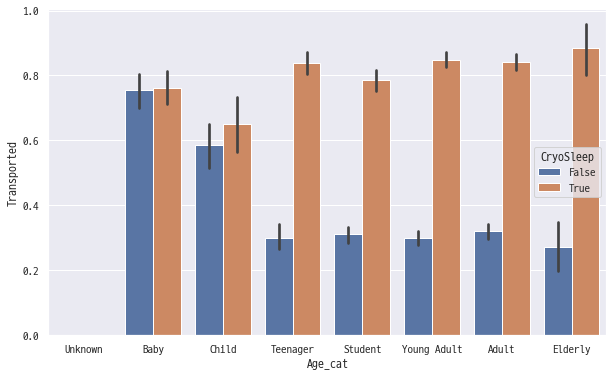

In [ ]:
plt. figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
data['Age_cat'] = data['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Transported', hue='CryoSleep', data=data, order=group_names)
data.drop('Age_cat', axis=1, inplace=True)

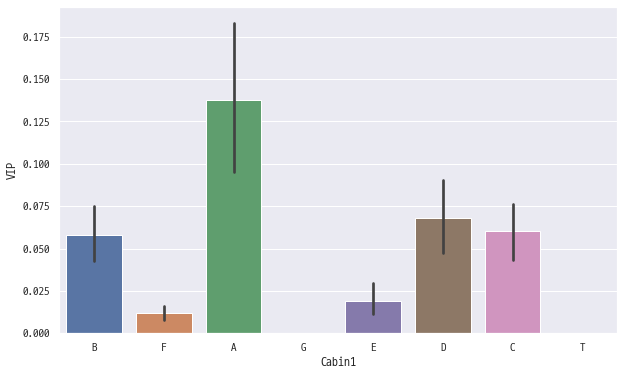

In [ ]:
plt. figure(figsize=(10, 6))

sns.barplot(x='Cabin1', y='VIP', data=data)
plt.show()

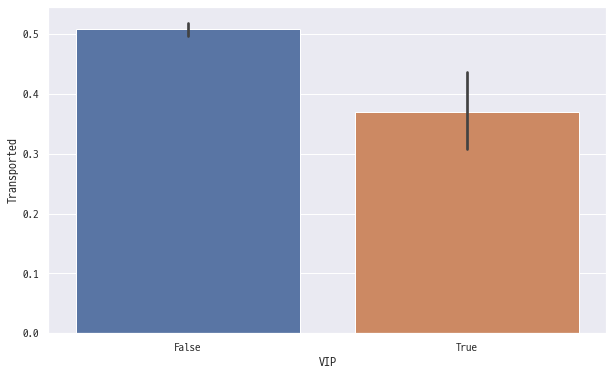

In [ ]:
plt. figure(figsize=(10, 6))

sns.barplot(x='VIP', y='Transported', data=data)
plt.show()

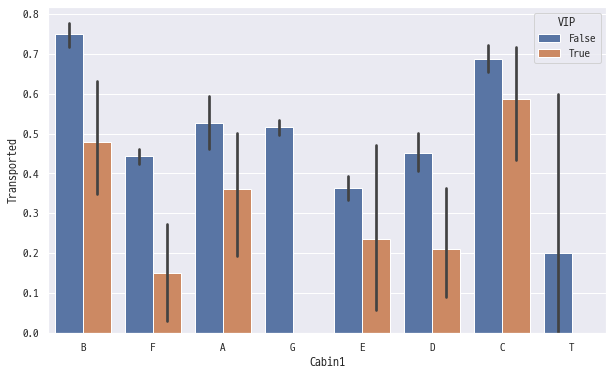

In [ ]:
plt. figure(figsize=(10, 6))

sns.barplot(x='Cabin1', y='Transported', hue='VIP', data=data)
plt.show()

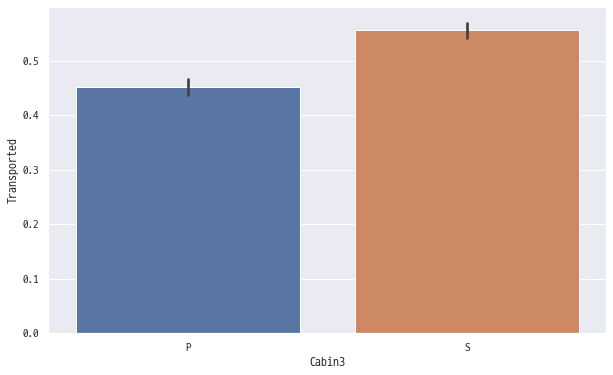

In [ ]:
plt. figure(figsize=(10, 6))

sns.barplot(x='Cabin3', y='Transported', data=data)
plt.show()

In [ ]:
data.Transported.value_counts()

True     4333
False    4257
Name: Transported, dtype: int64